# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path
import pickle

## Part 2 - Data Preprocessing

In [2]:
#Access input folder
current_dir = Path.cwd()
input_dir1 = Path ("H:/Chamodi/LSDYNA/Reflected_pressure/RP_Section_3_new")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2=  [folder1 for folder1 in input_dir1.iterdir() if folder1.is_dir()] # folder1 - RP_curves_fr7m
print ("2",input_dir2)

input H:\Chamodi\LSDYNA\Reflected_pressure\RP_Section_3_new
2 [WindowsPath('H:/Chamodi/LSDYNA/Reflected_pressure/RP_Section_3_new/RP_curves_fr07m'), WindowsPath('H:/Chamodi/LSDYNA/Reflected_pressure/RP_Section_3_new/RP_curves_fr09m'), WindowsPath('H:/Chamodi/LSDYNA/Reflected_pressure/RP_Section_3_new/RP_curves_fr11m'), WindowsPath('H:/Chamodi/LSDYNA/Reflected_pressure/RP_Section_3_new/RP_curves_fr13m')]


In [3]:
#dataset = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure', 'Phase'])
df_list = []

for folder1 in input_dir2:
    
    input_dir3 =  [folder2 for folder2 in folder1.iterdir() if folder2.is_dir()] # folder2 - 07m00.5kg
    
    for folder2 in input_dir3:
        
        print ('folder', folder2)
        files1 = [file1 for file1 in folder2.rglob("*.xlsx")]
    
        for file1 in files1:
            df_list.append(pd.read_excel(file1))
            print (file1.stem)
    
dataset = pd.concat(df_list, ignore_index = True)

folder H:\Chamodi\LSDYNA\Reflected_pressure\RP_Section_3_new\RP_curves_fr07m\07m00.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder H:\Chamodi\LSDYNA\Reflected_pressure\RP_Section_3_new\RP_curves_fr07m\07m02.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder H:\Chamodi\LSDYNA\Reflected_pressure\RP_Section_3_new\RP_curves_fr07m\07m04.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder H:\Chamodi\LSDYNA\Reflected_pressure\RP_Section_3_new\RP_curves_fr07m\07m06.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder H:\Chamodi\LSDYNA\Reflected_pressure\RP_Section_3_new\RP_curves_fr07m\07m08.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder H:\Chamodi\LSDYNA\Reflected_pressure\RP_Section_3_new\RP_curves_fr07m\07m10.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder H:\Chamodi\LSDYNA\Reflected_pressure\RP_Section_3_new\RP_curves_fr07m\07m12.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder H:\Chamodi\LSDYNA\Reflected_pressure\RP_Section_3_new\RP_curves_fr07m\07m14.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder H:\Chamodi\LSDYNA\Reflected_pressure\RP_Section_3_new\RP_curves_fr07m\07m

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43288 entries, 0 to 43287
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               43288 non-null  float64
 1   Standoff distance  43288 non-null  int64  
 2   Angle              43288 non-null  int64  
 3   Time               43288 non-null  float64
 4   Phase              43288 non-null  object 
 5   Pressure           43288 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.0+ MB


In [5]:
# Assuming your original column is named 'Category'
dataset['Phase'] = dataset['Phase'].replace({'negative_increasing': 'negative', 'negative_decreasing': 'negative'})
dataset = pd.get_dummies(dataset, columns =['Phase'], dtype = np.uint8)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43288 entries, 0 to 43287
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               43288 non-null  float64
 1   Standoff distance  43288 non-null  int64  
 2   Angle              43288 non-null  int64  
 3   Time               43288 non-null  float64
 4   Pressure           43288 non-null  float64
 5   Phase_negative     43288 non-null  uint8  
 6   Phase_positive     43288 non-null  uint8  
dtypes: float64(3), int64(2), uint8(2)
memory usage: 1.7 MB


In [6]:
dataset.head(30)

,Mass,Standoff distance,Angle,Time,Pressure,Phase_negative,Phase_positive
0,0.5,7,0,15.668162,26.333164,0,1
1,0.5,7,0,15.691678,26.252398,0,1
2,0.5,7,0,15.715176,25.534211,0,1
3,0.5,7,0,15.762182,23.376023,0,1
4,0.5,7,0,15.785727,22.375656,0,1
5,0.5,7,0,15.809281,21.536867,0,1
6,0.5,7,0,15.879851,19.511992,0,1
7,0.5,7,0,15.903403,18.672969,0,1
8,0.5,7,0,15.926977,17.629406,0,1
9,0.5,7,0,15.950563,16.382414,0,1


In [7]:
y = dataset['Pressure']
X = dataset.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(43288, 6) (43288,)


In [8]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_train[:,0:4] = sc.transform(X_train[:, 0:4])
print (X_train)

[[ 0.23877855 -1.42165282  1.29671652 -0.88120061  0.          1.        ]
 [-0.53751982  0.39543217  1.29671652  4.60092613  1.          0.        ]
 [ 0.23877855  0.39543217 -0.53791449 -0.34632664  0.          1.        ]
 ...
 [-1.70196738  0.39543217  0.37940102  0.24496622  0.          1.        ]
 [ 1.40322611  1.30397467  1.29671652  0.9280313   0.          1.        ]
 [-0.73159441 -1.42165282  0.37940102 -1.24167338  0.          1.        ]]


In [13]:
X_test[:,0:4] = sc.transform(X_test[:,0:4])
print (X_test)

[[-0.73159441 -1.42165282  0.37940102  0.06079329  1.          0.        ]
 [-0.14937063  1.30397467 -0.53791449  0.58166448  0.          1.        ]
 [ 0.23877855 -1.42165282 -1.45523    -1.26731561  0.          1.        ]
 ...
 [-0.73159441 -0.51311032  1.29671652  1.63623608  1.          0.        ]
 [ 0.23877855  1.30397467 -0.53791449 -0.13783423  0.          1.        ]
 [-1.89604197 -1.42165282 -1.45523    -0.89823987  1.          0.        ]]


In [14]:
X_val[:,0:4] = sc.transform(X_val[:,0:4])
print (X_val)

[[ 0.04470396  0.39543217 -1.45523    -0.70290327  0.          1.        ]
 [ 0.62692774  0.39543217  1.29671652  0.3393988   0.          1.        ]
 [ 0.82100233 -1.42165282  0.37940102 -1.48486668  0.          1.        ]
 ...
 [-0.92566901 -0.51311032 -1.45523    -0.30274393  0.          1.        ]
 [ 0.62692774 -1.42165282  0.37940102 -1.4478925   0.          1.        ]
 [ 1.20915152  1.30397467 -0.53791449 -0.30902471  0.          1.        ]]


In [15]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 25972
X_test 8658
X_val 8658


## Part 3 - Building the ANN

In [15]:
ann = tf.keras.models.Sequential()

In [16]:
ann.add(tf.keras.layers.Dense(units=150,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=125,
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=100,
                              activation='relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [18]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1050      
                                                                 
 dense_1 (Dense)             (None, 125)               18875     
                                                                 
 dense_2 (Dense)             (None, 100)               12600     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 32,626
Trainable params: 32,626
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

In [19]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [20]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [21]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=40,
                    verbose=1)

Epoch 1/500
650/650 [==============================] - 31s 46ms/step - loss: 556.2618 - mae: 10.3169 - val_loss: 233.9740 - val_mae: 5.8401
Epoch 2/500
650/650 [==============================] - 4s 6ms/step - loss: 217.2049 - mae: 5.7350 - val_loss: 134.9558 - val_mae: 5.1747
Epoch 3/500
650/650 [==============================] - 4s 6ms/step - loss: 128.7878 - mae: 4.4377 - val_loss: 82.9583 - val_mae: 3.7007
Epoch 4/500
650/650 [==============================] - 3s 5ms/step - loss: 120.5808 - mae: 4.2151 - val_loss: 99.3195 - val_mae: 3.6733
Epoch 5/500
650/650 [==============================] - 3s 5ms/step - loss: 78.9406 - mae: 3.4516 - val_loss: 48.0026 - val_mae: 3.0337
Epoch 6/500
650/650 [==============================] - 4s 6ms/step - loss: 79.0396 - mae: 3.4437 - val_loss: 60.1217 - val_mae: 3.0158
Epoch 7/500
650/650 [==============================] - 4s 6ms/step - loss: 91.9574 - mae: 3.8069 - val_loss: 53.7354 - val_mae: 2.8587
Epoch 8/500
650/650 [=========================

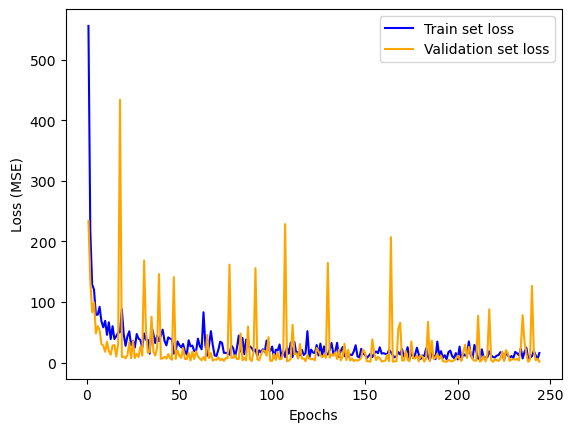

In [22]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Section3_ANN2_2.png', dpi=300, bbox_inches='tight')
plt.show()

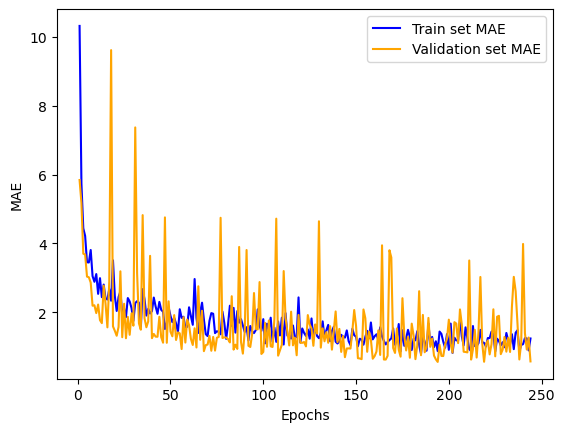

In [23]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('Section3_ANN2_3.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
ann.save('Section3_new_ANN_2')
import pickle
pickle.dump(sc, open('Section3_new_scaler_ANN_2.pkl', 'wb'))

INFO:tensorflow:Assets written to: Section3_new_ANN_2\assets


## Part 5 - Make predictions

271/271 [==============================] - 1s 2ms/step


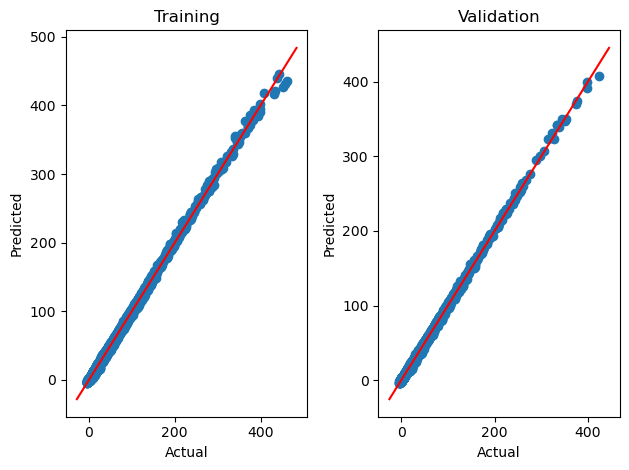

In [25]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

plt.savefig('Section3_ANN2_1.png', dpi=300, bbox_inches='tight')
# show the plot
plt.show()

In [16]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

271/271 [==============================] - 1s 1ms/step
[[-0.56 -0.54]
 [ 0.88  1.05]
 [ 4.58  4.31]
 ...
 [-0.73 -0.88]
 [22.69 22.34]
 [-0.61 -0.7 ]]


Text(0, 0.5, 'Predicted data')

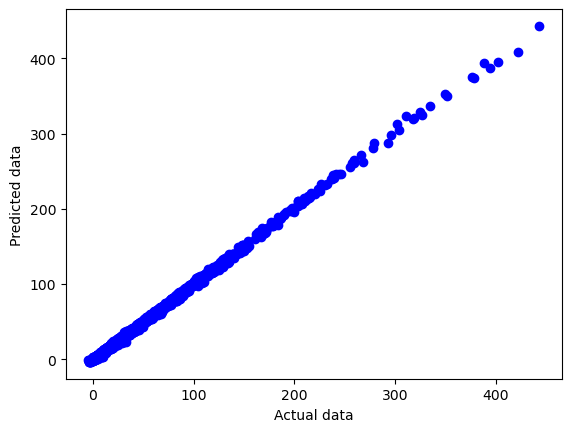

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,1200000],[0,1200000], color = "red")
#plt.axis ([0,1200000,0,1200000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

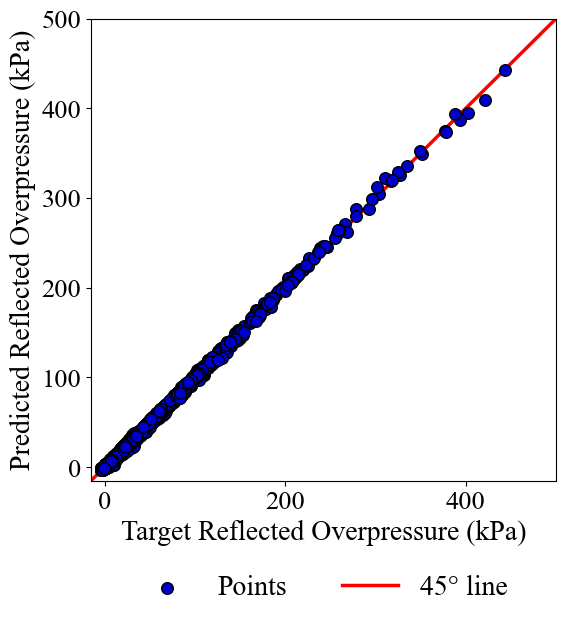

In [18]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

b_l = -15
u_l = 500

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Reflected Overpressure (kPa)')
plt.xlabel('Target Reflected Overpressure (kPa)')
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
#plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
#plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
#plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon = False, fontsize = 20)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black') 

plt.savefig('Section3_ANN2.png', dpi=300, bbox_inches='tight')

In [29]:
# metrics
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

812/812 [==============================] - 2s 3ms/step
0.5486254035455409
0.5619253878639132


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9990884661378174


In [31]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9990558711551495


In [32]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 44.87%
Within 10% margin 58.88%
Within 20% margin 68.65%
Out of 20% margin 31.35%


In [33]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9990878339330812


In [34]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

1.00172239788541

In [35]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.5619253878639132

In [11]:
ann = load_model('Section3_new_ANN_2')
sc = pickle.load(open('Section3_new_scaler_ANN_2.pkl', 'rb'))

D:\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.4.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
